# `AA Workshop 8` 

In this workshop we first become familiar with ensamble methods commonly used in a myriad of classification problems. Afterwards, we work through some examples on non-linear classification.

We will cover the following: 

1. Ensemble methods: Boosting, Random forests, Bagging
1. Non-linear classification methods

In [1]:
import warnings
warnings.filterwarnings('ignore')

import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


%matplotlib inline

# Ensemble Methods

In predictive modeling, “risk” is equivalent to variation (i.e. variance) in prediction error. Ensemble methods are targeted at reducing variance, thus increasing predictive power.
The core idea is that by combining the outcomes of individual models, e.g., by taking an average, variance may be reduced. Thus, using an average of two or more predictions can potentially lead to smaller error variance, and therefore better predictive power.

We will discuss three forms of ensemble learning:
- Bagging
- Boostign
- Random Forests

Let's start applying the above method on the classification problem of *breast cancer* dataset:

In [2]:
cancer_df = pd.read_csv("breast_cancer.csv", index_col="id")
cancer_df.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [3]:
X = np.array(cancer_df[['area_mean','concave points_mean']])
Y = cancer_df['diagnosis'].values

Y  = np.where(Y=="M", int(1), Y) 
Y  = np.where(Y=="B", int(0), Y) 
Y = Y.astype('int')

In [4]:
# train test split on breast cancer dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

## Boosting
Here the goal is to directly improve areas in the data where our model makes errors, by forcing the model to pay more attention to those records. 

Boosting involves incrementally building an ensemble by training each new model instance to emphasize the training instances that previous models mis-classified. In some cases, boosting has been shown to yield better accuracy than bagging, but it also tends to be more likely to over-fit the training data. By far, the most common implementation of boosting is Adaboost, although some newer algorithms are reported to achieve better results.

In Boosting, an equal weight (uniform probability distribution) is given to the sample training data (say D1) at the very starting round. This data (D1) is then given to a base learner (say L1). The mis-classified instances by L1 are assigned a weight higher than the correctly classified instances, but keeping in mind that the total probability distribution will be equal to 1. This boosted data (say D2) is then given to second base learner (say L2) and so on. The results are then combined in the form of voting.
The steps in boosting are:

1. Fit a model to the data.
2. Draw a sample from the data so that misclassified records (or records with large prediction errors) have higher probabilities of selection.
3. Fit the model to the new sample.
4. Repeat Steps 2–3 multiple times.

### AdaBoost

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [5]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(random_state=1)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9020979020979021

### Gradient Tree Boosting

GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage ``n_classes_`` regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. Binary classification is a special case where only a single regression tree is induced.


In [6]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9090909090909091

### XGBoost

XGBoost is an ensemple method that uses **boosting**. While XGBoost is not included in sklearn, there is a very well developed API that can be installed by executing the following command:
- `conda install -c conda-forge xgboost`

For further details refere to
- XGBoost: see [here](https://xgboost.readthedocs.io/en/latest/)

Once you have completed the installation you are good to go. Let us fit a v. simple classifier to the breastcancer dataset.

In [7]:
# sepcify and fit model
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(booster="gbtree")
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test,xgb_classifier.predict(X_test))

array([[81,  8],
       [ 5, 49]])

In [9]:
accuracy_score(y_test,xgb_classifier.predict(X_test))

0.9090909090909091

Obviously, there is likely room for improvement as you grid search some of the hyperparameters. However, by just taking the default setting, we already achieve an accuracy score that is comparable to that of a grid-searched decision tree.

## Bagging

Bootstrap aggregating, often abbreviated as bagging, involves having each model in the ensemble vote with equal weight. In order to promote model variance, bagging trains each model in the ensemble using a randomly drawn subset of the training set. As an example, the random forest algorithm combines random decision trees with bagging to achieve very high classification accuracy.

In bagging the samples are generated in such a way that the samples are different from each other however replacement is allowed. Replacement means that an instance can occur in multiple samples a multiple times or it can not appear in some samples at all. These samples are then given to multiple learners and then the results from each learner are combined in the form of voting. Bagging comprises two steps:
1. Generate multiple random samples (by sampling with replacement from the original data)—this method is called “bootstrap sampling.”
2. Running an algorithm on each sample and producing scores.

Very useful for algorithms such as trees and neural networks.

In [10]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

In [11]:
model = BaggingClassifier(base_estimator=
    tree.DecisionTreeClassifier(criterion="entropy", max_depth=2, random_state=1), 
    max_samples=0.5, 
    max_features=0.5)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9020979020979021

## Random Forests

Random Forests is a selection of n trees which are trained in parallel. Predictions are made by averaging the outputs across these n trees. Random Forest are most often combined with **bagging**, i.e. different boostrap samples of the training data are used to train the individual trees.

Further details can be found in the following links [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [12]:
from sklearn.ensemble import RandomForestClassifier

# sepcify and fit model

rf_classifier = RandomForestClassifier(n_estimators=100, 
                                       bootstrap=True) # we select boostrapp, i.e. we use bagging
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test,rf_classifier.predict(X_test))

array([[78, 11],
       [ 3, 51]])

In [14]:
accuracy_score(y_test,rf_classifier.predict(X_test))

0.9020979020979021

Again, just by taking the default setting, we obtain very good results that are comparable to those of the fully grid-searched decision tree.

# `Non-Linear Classification`

Just like for linear vs. non-linear regression, the application to the classification setting is just a matter of plugging in the relevant features into our classification algorithms.  Here we won't bother with implementing the algorithms again manually. Instead, we'll use the scikit learn implementations of the support vector machine with explicit nonlinear features or with kernels, to visualize the kind of decision functions that result from the inclusion of nonlinear features in classification.

Let's begin by considering again our example of the breast cancer cell classification task, loading the data and running a linear SVM on the two-feature reduced example.


In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [16]:
norm = StandardScaler()
X_norm = norm.fit_transform(X)  # simultaneously fit and transform 

In [17]:
def poly_feat_sklearn (X, deg):
    model = PolynomialFeatures(deg)
    X = model.fit_transform(X)
    return X

In [18]:
def plot_classification_sklearn_non_lin(model, norm, deg):
    x_range = [0,2600]
    y_range = [0, 0.21]
    plt.figure(figsize = (10,8))
    
    # plot classifcation regions
    grid=200
    xx,yy = np.meshgrid(np.linspace(x_range[0], x_range[1], grid),
                        np.linspace(y_range[0], y_range[1], grid))  # create coordinate mesh
    
    X_ = np.array([np.ravel(xx), np.ravel(yy)]).T
    zz = model.decision_function(poly_feat_sklearn(norm.transform(X_),deg)).reshape(grid,grid)
    cs = plt.contourf(xx,yy,zz, zz,levels=[-float("inf"),0,float("inf")],alpha=0.2,colors=["b","r"])
    plt.contour(cs, colors='k')

    s1 = plt.scatter(cancer_df[cancer_df["diagnosis"]=='M']['area_mean'], cancer_df[cancer_df["diagnosis"]=='M']['concave points_mean'], marker='x', color='C3')
    s2 = plt.scatter(cancer_df[cancer_df["diagnosis"]=='B']['area_mean'], cancer_df[cancer_df["diagnosis"]=='B']['concave points_mean'], marker='+', color='C0')    
    plt.xlim([0,2600])
    plt.ylim([0,0.21])
    plt.xlabel("Mean Area")
    plt.ylabel("Mean Concave Points")
    plt.legend([s1,s2],['Malignant','Benign'])

In [19]:
from sklearn.svm import LinearSVC # Linear Support Vector Classifier

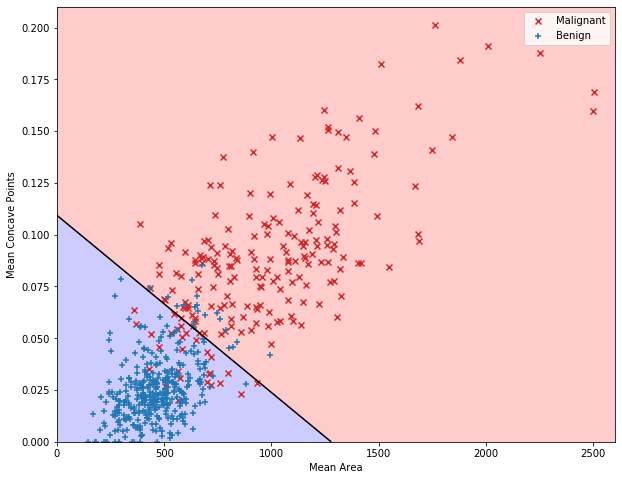

In [20]:
deg=1
Phi = poly_feat_sklearn(X_norm, deg)
model_SVM_poly = LinearSVC(loss='hinge',max_iter=100000)
model_SVM_poly.fit(Phi, Y)
plot_classification_sklearn_non_lin(model_SVM_poly, norm, deg)

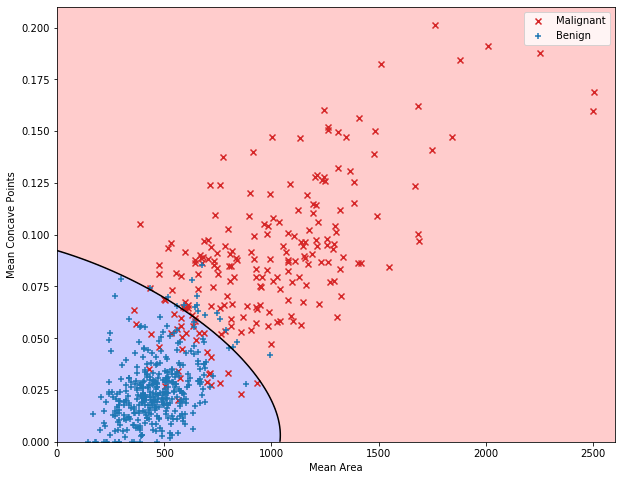

In [21]:
deg=2
Phi = poly_feat_sklearn(X_norm, deg)
model_SVM_poly = LinearSVC(loss='hinge',max_iter=100000)
model_SVM_poly.fit(Phi, Y)
plot_classification_sklearn_non_lin(model_SVM_poly, norm, deg)

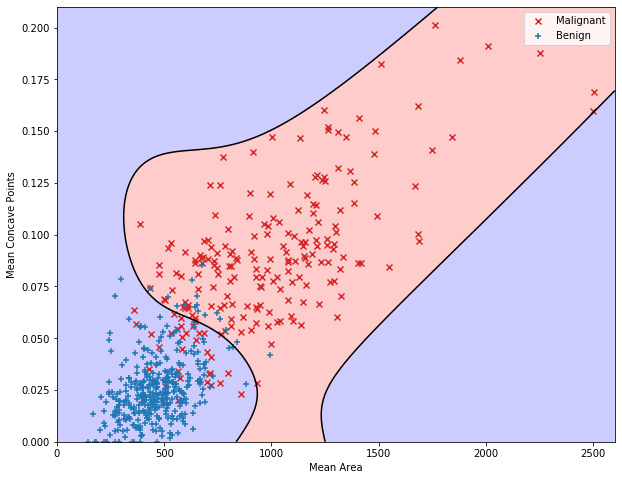

In [22]:
deg=4
Phi = poly_feat_sklearn(X_norm, deg)
model_SVM_poly = LinearSVC(loss='hinge',max_iter=100000)
model_SVM_poly.fit(Phi, Y)
plot_classification_sklearn_non_lin(model_SVM_poly, norm, deg)

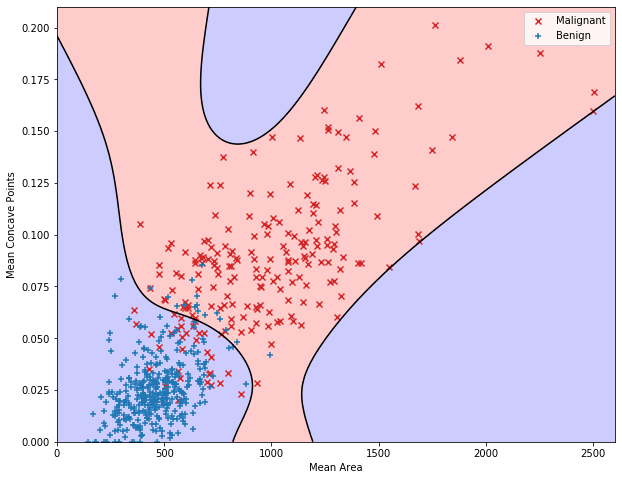

In [23]:
deg=6
Phi = poly_feat_sklearn(X_norm, deg)
model_SVM_poly = LinearSVC(loss='hinge',max_iter=100000)
model_SVM_poly.fit(Phi, Y)
plot_classification_sklearn_non_lin(model_SVM_poly, norm, deg)

At this point, just like with the regression examples we saw, the model is probably starting to overfit.  And just like before, we can counteract this to some extent by increasing the regularization parameters (or in scikit learn's terminology, decreasing the $C$ parameter).

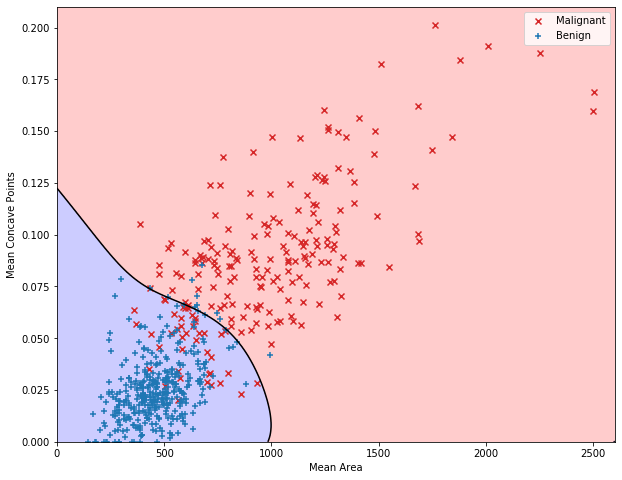

In [24]:
deg=6
Phi = poly_feat_sklearn(X_norm, deg)
model_SVM_poly = LinearSVC(loss='hinge',max_iter=100000, C=0.1)
model_SVM_poly.fit(Phi, Y)
plot_classification_sklearn_non_lin(model_SVM_poly, norm, deg)

Scikit learn actually contains a more general implementattion of SVM classification, which allows us to freely use the kernel type (linear, RBF, poly, etc.). Let's have a look and let us consider some kernel-based functions.

Finally, let's consider some of the kernel-based functions.  Here we're going to just use the kernel classifiers built by scikit learn, but by combining the kernel section above with the explicit code in the previous sections, it would be straightforward to write our own implementation as well.  First let's start with the polynomial kernel.  Note that in addition to adding the `degree=d` parameter, you'll want to set the `coef0=1.0` parameter to include the constant term `1` in the kernel function (without this, the polynomial kernel only has terms of degree _exactly_ $d$, and typically performs quite poorly.

### `Polynomial Kernel`

In [25]:
def plot_classification_sklearn(model, norm):
    x_range = [0,2600]
    y_range = [0, 0.21]
    plt.figure(figsize = (10,8))
    
    # plot classifcation regions
    grid=1000
    xx,yy = np.meshgrid(np.linspace(x_range[0], x_range[1], grid),
                        np.linspace(y_range[0], y_range[1], grid))
    X_ = np.array([np.ravel(xx), np.ravel(yy)]).T
    zz = model.decision_function(norm.transform(X_)).reshape(grid,grid)
    cs = plt.contourf(xx,yy,zz, zz,levels=[-float("inf"),0,float("inf")],alpha=0.2,colors=["b","r"])
    plt.contour(cs, colors='k')
    
    # plot data points
    s1 = plt.scatter(cancer_df[cancer_df["diagnosis"]=='M']['area_mean'], cancer_df[cancer_df["diagnosis"]=='M']['concave points_mean'], marker='x', color='C3')
    s2 = plt.scatter(cancer_df[cancer_df["diagnosis"]=='B']['area_mean'], cancer_df[cancer_df["diagnosis"]=='B']['concave points_mean'], marker='+', color='C0')    
    plt.xlim([0,2600])
    plt.ylim([0,0.21])
    plt.xlabel("Mean Area")
    plt.ylabel("Mean Concave Points")
    plt.legend([s1,s2],['Malignant','Benign'])

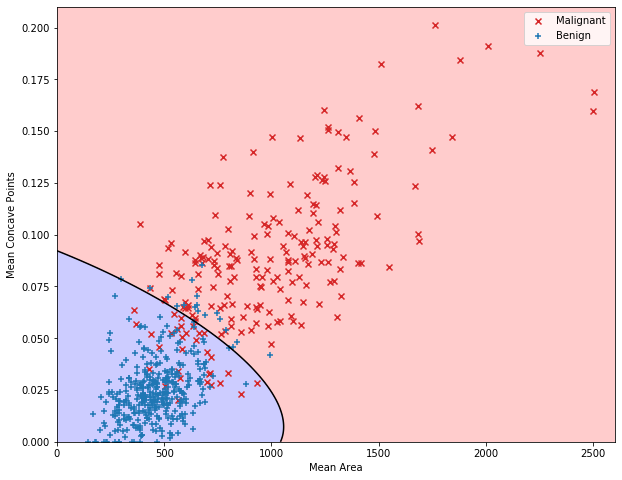

In [26]:
from sklearn.svm import SVC

deg=2
model = SVC(kernel='poly', C=100.0, degree=deg, coef0=1.0)
model.fit(X_norm, Y)
plot_classification_sklearn(model, norm)

Note that this returns exactly the same result as our manually defined linear SVM with polynomial features. This is a good sanity check!

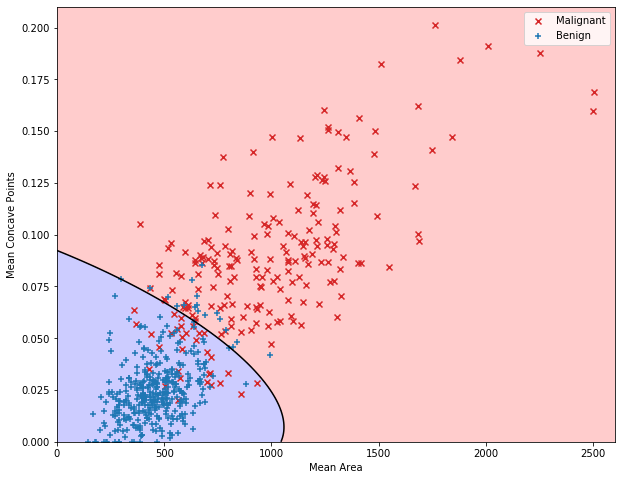

In [27]:
deg=2
Phi = poly_feat_sklearn(X_norm, deg)
model_SVM_poly = LinearSVC(loss='hinge',max_iter=100000, C=100)
model_SVM_poly.fit(Phi, Y)
plot_classification_sklearn_non_lin(model_SVM_poly, norm, deg)

### `RBF Kernel`

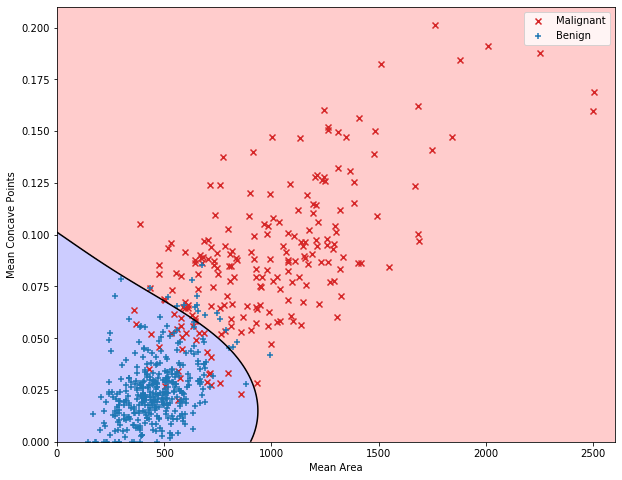

In [28]:
gamma = 1 / (len(X_norm) * X_norm.var()) # scikit-learn uses gamma = 1/(n_features*X.var()) parameterization
model_rbf = SVC(kernel='rbf', C=10.0, gamma=100*gamma)
model_rbf.fit(X_norm, Y)
plot_classification_sklearn(model_rbf, norm)

And finally, because all these example admittedly look fairly similar (the decision boundary _is_ roughly linear with some noise, after all), let's consider a case where we make the bandwidth small enough so that the method is guaranteed overfit to the training data.  Here we make the bandwidth very small (i.e. $\gamma$ large), and the regularization small, so that the classifier actually managed to get 100% accuracy on the training data (of course with very poor generalization performance.

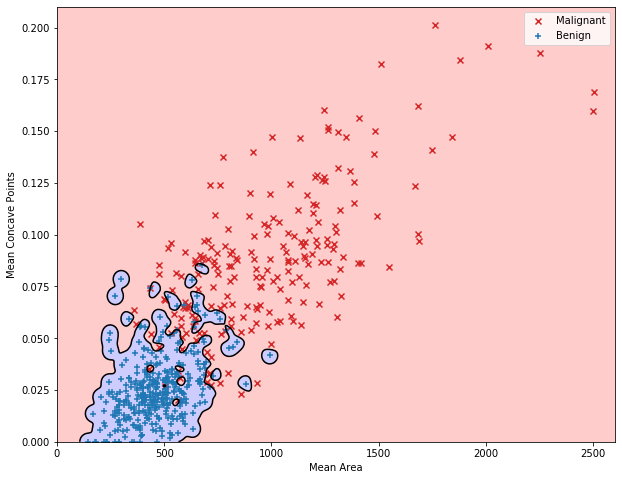

In [29]:
gamma = 1 / (len(X_norm) * X_norm.var()) # scikit-learn uses gamma = 1/(n_features*X.var()) parameterization
model_rbf = SVC(kernel='rbf', C=10.0, gamma=100000*gamma)
model_rbf.fit(X_norm, Y)
plot_classification_sklearn(model_rbf, norm)

The important thing to keep in mind through all this is how the nonlinear features and hyperparameter settings will influence the ability of functions to represent complex data and to overfit and underfit the data.  And of course, when using scikit learn, you'll need to understand the documentation to the point where you see how the hyperparameters of the class of interest map to the parameters that you actually want to control.  This usually requires going through the documentation a fair amount, but it's quite important, and the default parameters are often quite poor.

---